Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Getting the Dataset

In [8]:
dataset = pd.read_csv('Ecommerce Customers')

In [9]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Getting The Stats value of the Dataset

In [10]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Getting The info of the dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Exploratory Data Analysis

First we will explore the amount of time spent in website and the amount spent on the website

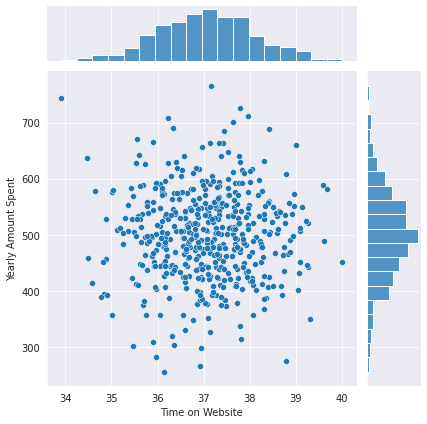

In [17]:
sns.set_style('darkgrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data = dataset)

Now we will explore the amount spent on their mobile app

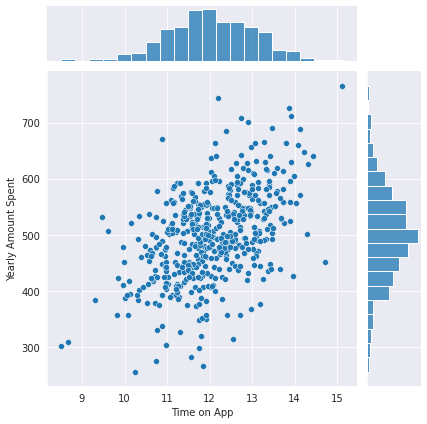

In [18]:
sns.set_style('darkgrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data = dataset)

Now we will explore the Membership w.r.t the app

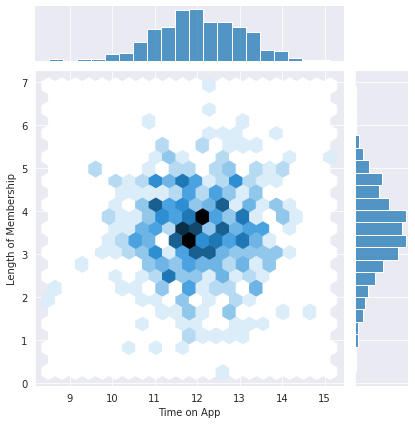

In [23]:
sns.jointplot(x='Time on App',y='Length of Membership',kind = 'hex',data = dataset)

Now we will do full exploratory analysis on whole dataset

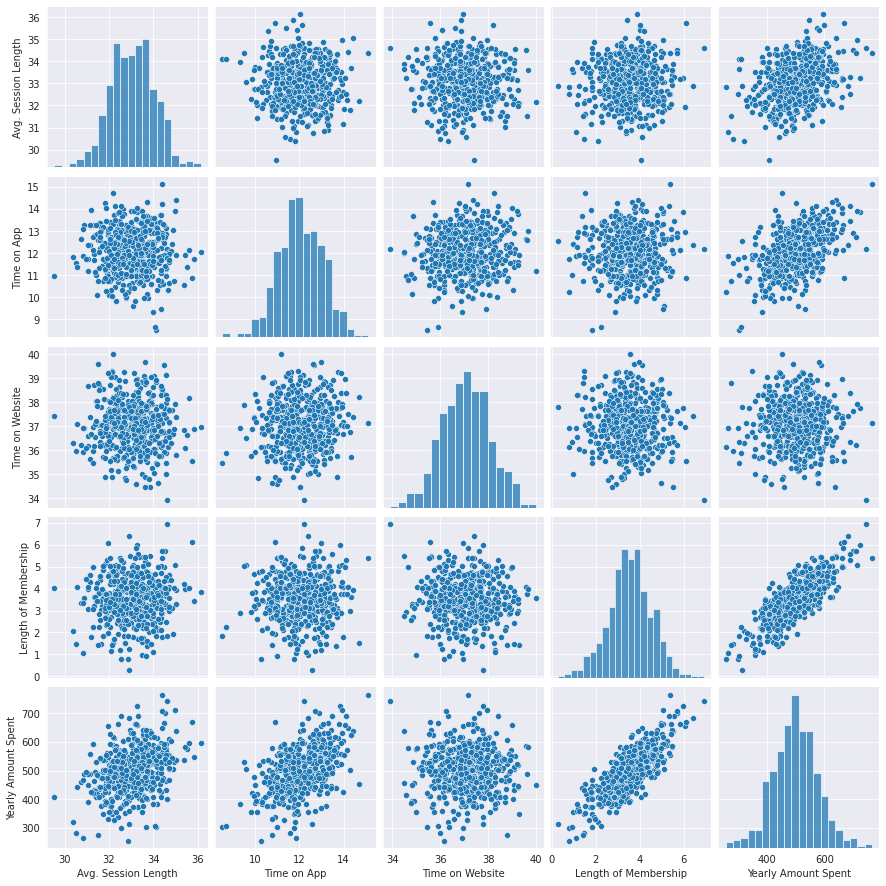

In [24]:
sns.pairplot(dataset)

From above analysis we can see we get a good corelation between yearly amount and lenght of membership

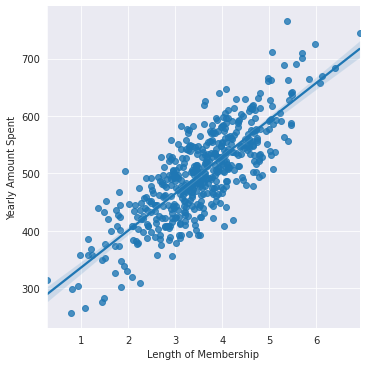

In [33]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=dataset,height=5,aspect=1)

Getting the data to train the model

In [38]:
x = dataset[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = dataset['Yearly Amount Spent']

In [39]:
print(x)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]


In [40]:
print(y)

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64


Splitting The dataset into Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
print(x_train)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
141            31.851253    12.418962        35.977652              3.251742
383            34.188184    13.130022        35.429334              3.790552
135            33.358398    12.703688        36.100914              2.724108
493            32.060914    12.625433        35.539142              5.412358
122            33.268330    11.113330        37.387946              4.018727
..                   ...          ...              ...                   ...
323            32.762456    10.952353        37.646292              4.019470
192            33.694898    11.202670        35.493964              4.015987
117            33.059264    11.725910        35.999099              5.004821
47             32.726785    12.988510        36.462003              4.113226
172            34.482388    13.283033        35.907298              4.968743

[350 rows x 4 columns]


In [43]:
print(x_test)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
90             32.491447    12.530357        37.875219              2.476139
254            32.711119    12.326291        36.673878              3.350279
283            33.077731    11.466984        35.675728              1.809230
445            32.212924    11.732991        35.633954              4.331863
461            32.770492    11.371767        35.261498              4.034386
..                   ...          ...              ...                   ...
4              33.330673    12.795189        37.536653              4.446308
318            33.531860    13.665770        36.900221              3.515688
331            32.274594    12.954811        37.108816              3.689917
245            32.980029    11.201160        37.689337              2.412831
5              33.871038    12.026925        34.476878              5.493507

[150 rows x 4 columns]


In [44]:
print(y_train)

141    472.992247
383    583.977802
135    482.353570
493    627.603319
122    514.239521
          ...    
323    473.360496
192    505.119638
117    593.077241
47     563.672873
172    666.125592
Name: Yearly Amount Spent, Length: 350, dtype: float64


In [45]:
print(y_test)

90     449.070319
254    482.602467
283    374.269675
445    513.153112
461    502.771075
          ...    
4      599.406092
318    564.790969
331    533.040060
245    409.070472
5      637.102448
Name: Yearly Amount Spent, Length: 150, dtype: float64


Training the Linear Regression Model on the Training set

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the new test result

In [47]:
y_pred = regressor.predict(x_test)

Visualizing the Training set 

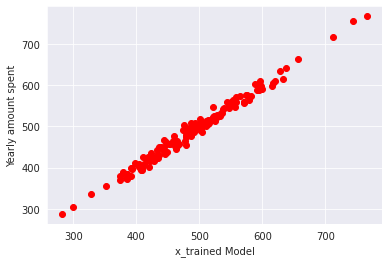

In [49]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('x_trained Model')
plt.ylabel('Yearly amount spent')
plt.show()

Evaluating The Model by taking R^2 test

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9849262667370622

Lets check the Residual 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


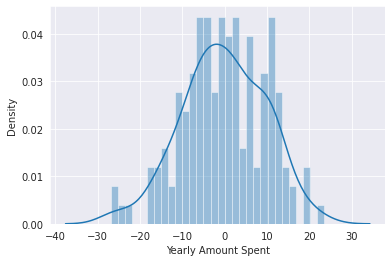

In [53]:
sns.distplot((y_test-y_pred),bins=30)

For the last part let's see the coefficient to check the overall work of our model and does the coefficient better describe our problem statement

In [57]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 2.57675297e+01  3.88003936e+01 -1.80409231e-02  6.18525679e+01]


In [58]:
coeffecients = pd.DataFrame(regressor.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


Conclusion

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.






